NOVANECTOR - NN/08/1079 - PRODUCT RECOMMENDATION

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [77]:
data = pd.read_csv('/content/Product_recommendation.csv' , index_col = 0)
data

,TV,radio,newspaper,sales
index,,,,
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8


In [78]:
data.shape

(200, 4)

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [72]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


TV's mean is highest than others

In [73]:
type(data)

pandas.core.frame.DataFrame

<ipython-input-88-f3d4fafcf1ed>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.sales , color='b' , ax = axes[0,0])
<ipython-input-88-f3d4fafcf1ed>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.TV , hist = False , rug=True , color='r' , ax=axes[0,1])
<ipython-input-88-f3d4

<Axes: xlabel='newspaper', ylabel='Density'>

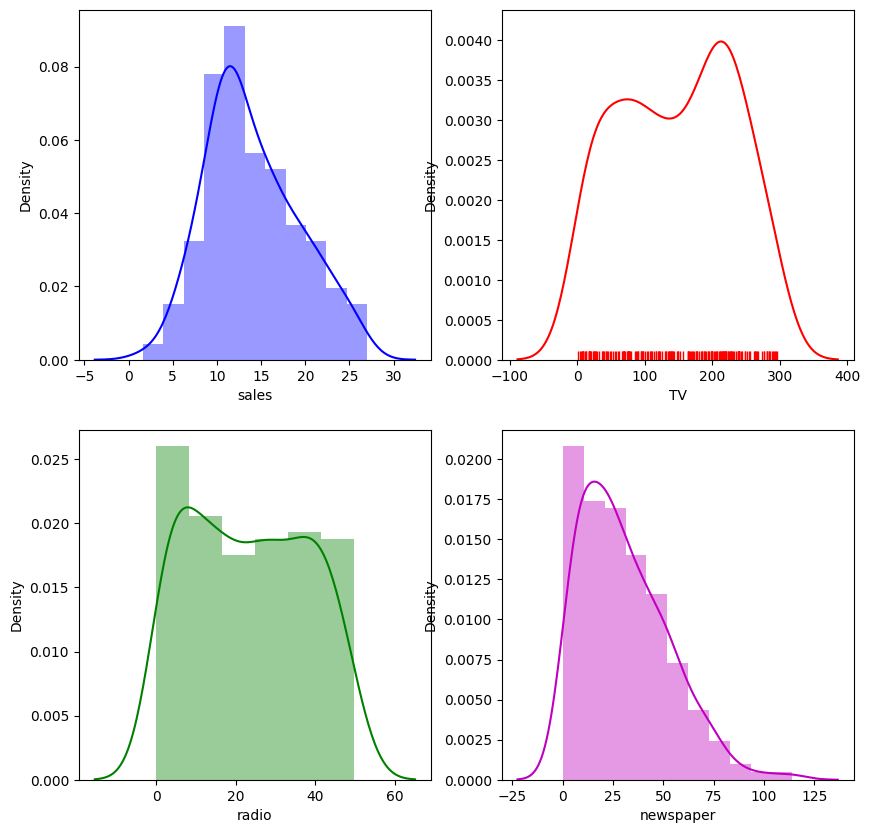

In [88]:
f,axes = plt.subplots(2,2,figsize=(10,10), sharex=False)
sns.distplot(data.sales , color='b' , ax = axes[0,0])
sns.distplot(data.TV , hist = False , rug=True , color='r' , ax=axes[0,1])
sns.distplot(data.radio , color='g' , ax=axes[1,0])
sns.distplot(data.newspaper , color='m' , ax=axes[1,1])

sales seems to be normal distribution , spend on TV is higher than spend on radio and newspaper

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


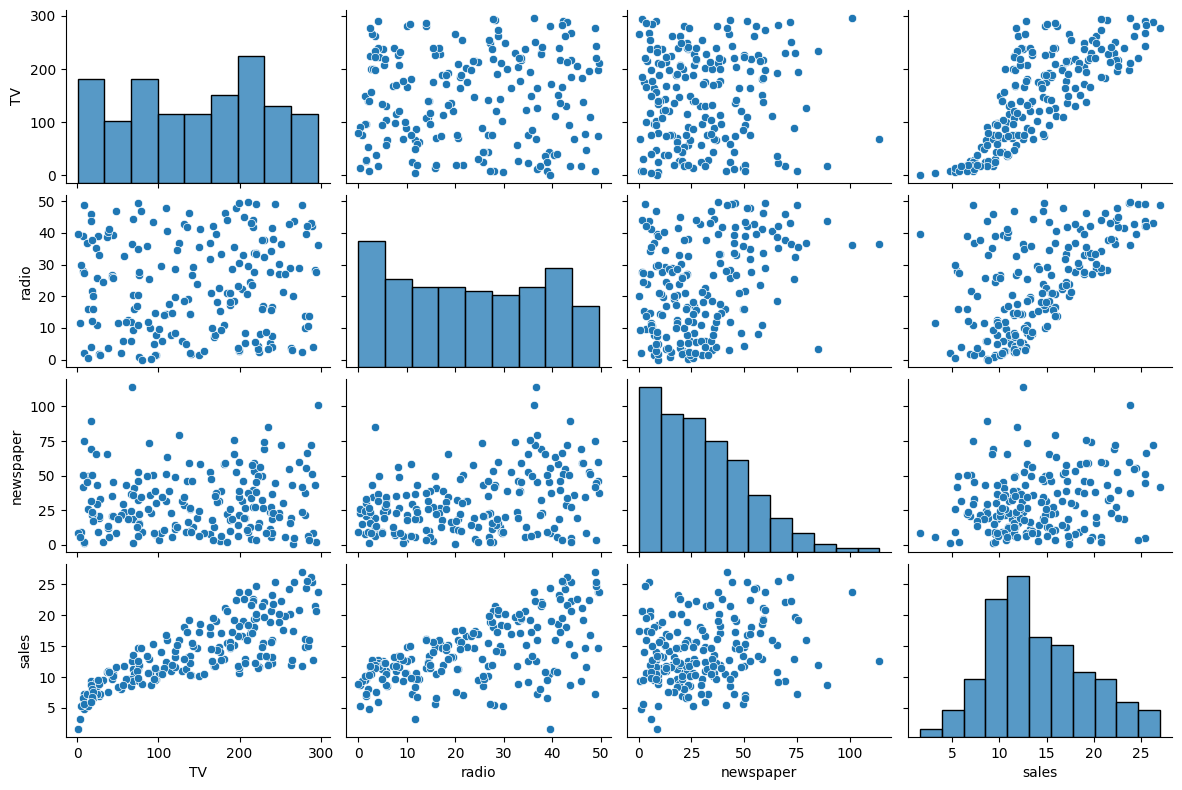

In [89]:
sns.pairplot(data , size= 2 , aspect= 1.5)

spend and sales on newspaper is not highly correlated where are sales and spend on tv is highly correlated

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


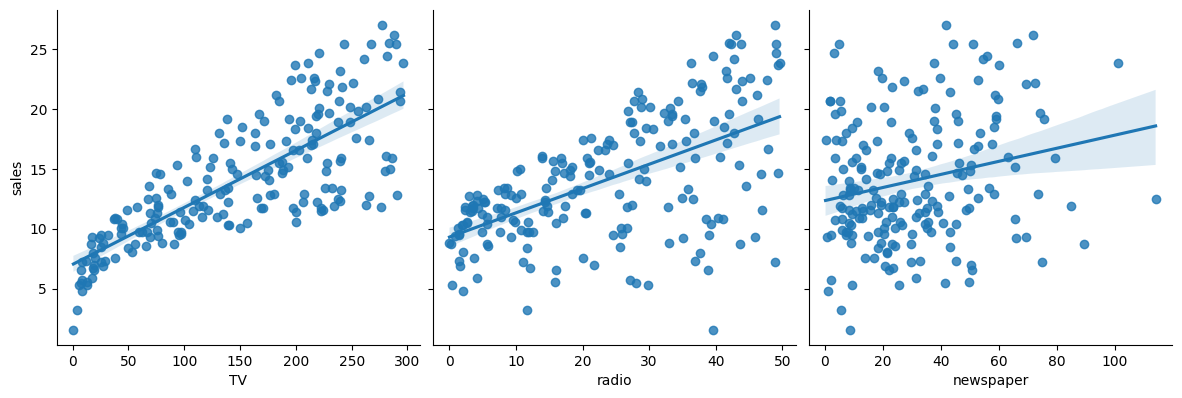

In [90]:
sns.pairplot(data , x_vars=['TV','radio','newspaper'], y_vars='sales', size=4, aspect=1, kind='reg')

strong relationship between TV ads and sales , weak relationship between radio ads and sales , very weak to no relationship between newspaper ads and sales

In [91]:
# calculating and ploting heatmap correlation

In [92]:
data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

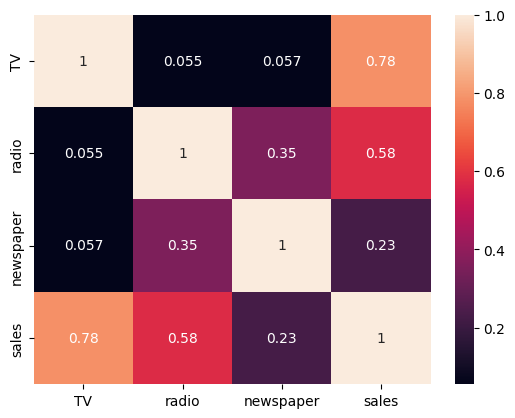

In [93]:
sns.heatmap(data.corr() , annot = True)

correlation between TV and sale is 0.78
correlation betweeen radio and sale is 0.58
correlation between newspaper and sales is 0.23 which is lowest